# Sentiment Analysis using Logistic Regression & Different Feature Extraction Methods

## Introduction

In this notebook, I've performed Sentiment Analysis on a dataset using three different feature extraction techniques: Bag of Words (BoW), TF-IDF, and Word2Vec. 

I'll train Logistic Regression Models for Sentiment classification and compare their performance.

In [1]:
import numpy as np
import scipy as sp
import dvc.api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [2]:
"""Load target"""
y_train = np.load("../data/final/y_train.npy")
y_test =  np.load("../data/final/y_test.npy")

In [3]:
"""Load features"""
X_train_bow = sp.sparse.load_npz("../data/final/bow_vectorizer/x_train.npz")
X_test_bow = sp.sparse.load_npz("../data/final/bow_vectorizer/x_test.npz")

X_train_tfidf = sp.sparse.load_npz("../data/final/tfidf_vectorizer/x_train.npz")
X_test_tfidf = sp.sparse.load_npz("../data/final/tfidf_vectorizer/x_test.npz")

In [12]:
type(X_train_bow)

scipy.sparse._csr.csr_matrix

In [28]:
'''Load params'''
model_params = dvc.api.params_show()

('vectorizer_bow', 'catboost')

: 

## Logistic Regression Model Training

### LR using BoW

In [ ]:
lr_bow = LogisticRegression(**model_params['logistic_regression'])
lr_bow.fit(X_train_bow, y_train)

In [ ]:
y_pred_bow = lr_bow.predict(X_test_bow)

In [ ]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Logistic Regression with BoW Accuracy:", accuracy_bow)
print("Classification Report with BoW:")
print(classification_report(y_test, y_pred_bow))

In [ ]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for BoW')
plt.show()

### LR using TF-IDF

In [8]:
lr_tfidf = LogisticRegression(**model_params['logistic_regression'])
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=5000000, random_state=42)

In [9]:
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

In [10]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", accuracy_tfidf)
print("Classification Report with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

Logistic Regression with TF-IDF Accuracy: 0.8880275
Classification Report with TF-IDF:
              precision    recall  f1-score   support

           1       0.89      0.88      0.89    200000
           2       0.88      0.89      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000



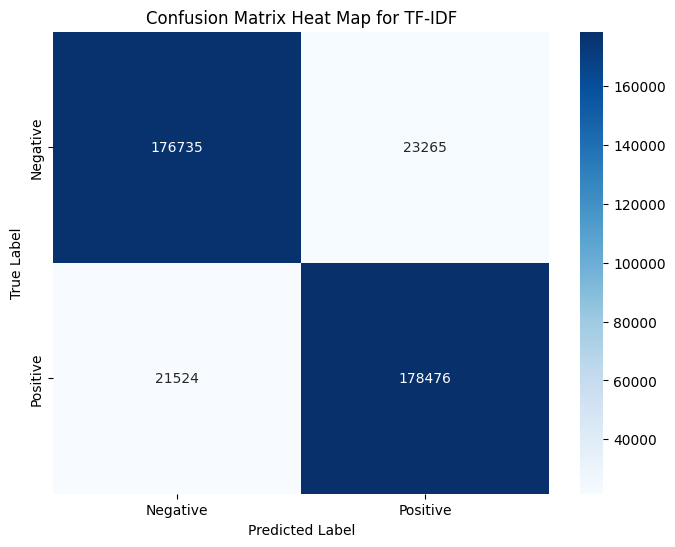

In [11]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for TF-IDF')
plt.show()

### Catboost with BoW

### Catboost using TF-IDF